In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel('aa.xlsx')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [ ]:
df['Revenue'] = df['Quantity'] * df['Unit price']

In [ ]:
df = df.rename(columns={'Quantity': 'Sales'})

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Sales,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


In [ ]:
df.groupby(['City', 'Branch']).agg({'Revenue': 'sum','Sales' : 'sum' })

Revenue  Sales
City      Branch                 
Mandalay  A       34130.09    637
          B       37215.93    664
          C       29794.62    519
Naypyitaw A       35985.64    648
          B       35157.75    604
          C       34160.14    579
Yangon    A       33647.27    598
          B       35193.51    631
          C       32302.43    630

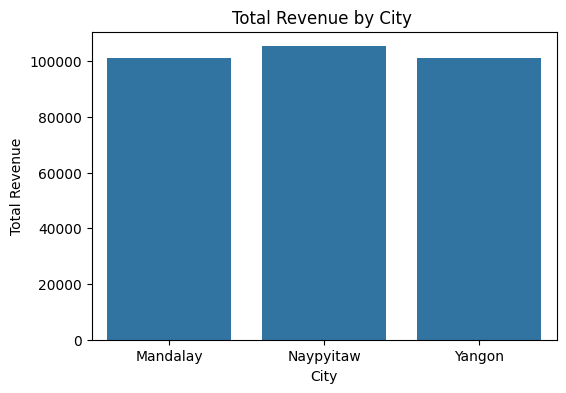

In [ ]:
grouped_data = df.groupby(['City']).agg({'Revenue': 'sum'}).reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=grouped_data, x='City', y='Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by City ')
plt.show()

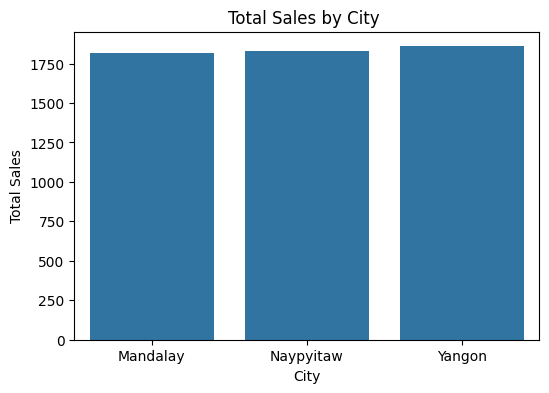

In [ ]:
grouped_data = df.groupby(['City']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=grouped_data, x='City', y='Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City ')
plt.show()

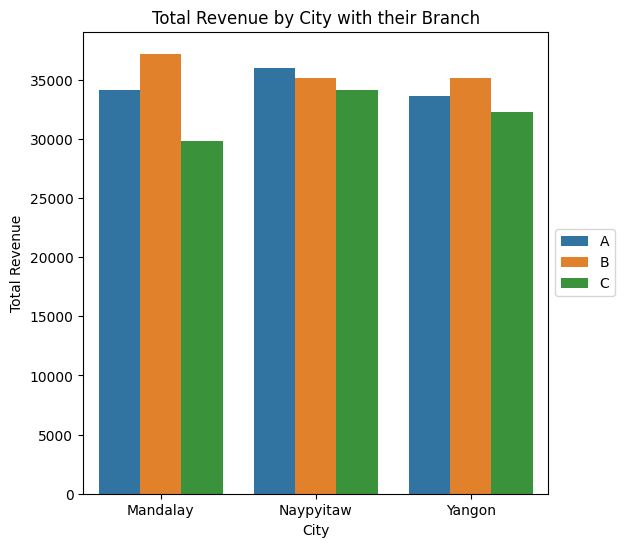

In [ ]:
grouped_data = df.groupby(['City', 'Branch']).agg({'Revenue': 'sum'}).reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(data=grouped_data, x='City', y='Revenue', hue='Branch')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by City with their Branch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


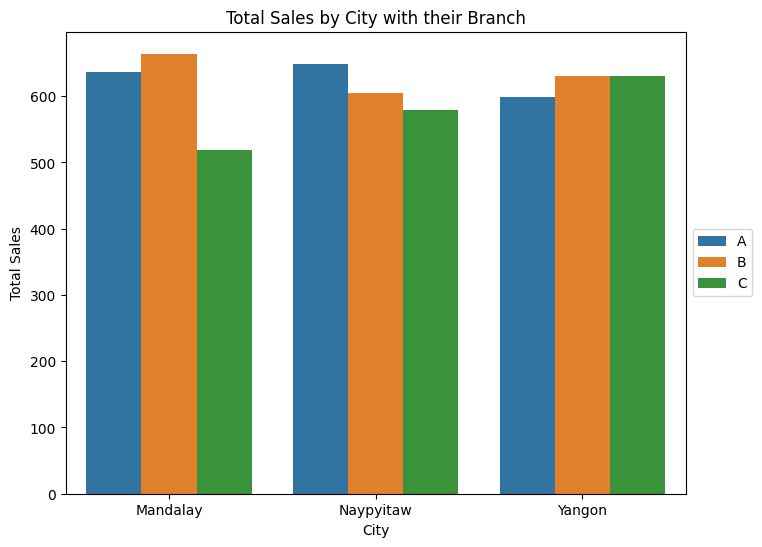

In [ ]:
grouped_data = df.groupby(['City', 'Branch']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x='City', y='Sales', hue='Branch')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City with their Branch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
df.groupby(['City', 'Branch','Product line']).agg({'Revenue': 'mean' })


Revenue
City      Branch Product line                      
Mandalay  A      Electronic accessories  222.063000
                 Fashion accessories     262.316000
                 Food and beverages      294.365556
                 Health and beauty       391.762857
                 Home and lifestyle      352.180500
                 Sports and travel       241.093636
          B      Electronic accessories  350.660909
                 Fashion accessories     206.920000
                 Food and beverages      281.507778
                 Health and beauty       367.765294
                 Home and lifestyle      327.932222
                 Sports and travel       342.196000
          C      Electronic accessories  314.128462
                 Fashion accessories     281.540526
                 Food and beverages      294.617857
                 Health and beauty       331.477727
                 Home and lifestyle      313.925000
                 Sports and travel       345.161333
Naypyitaw A      Electronic accessories  390.999412
                 Fashion accessories     257.241429
                 Food and beverages      393.311250
                 Health and beauty       322.153333
                 Home and lifestyle      346.442308
                 Sports and travel       230.581429
          B      Electronic accessories  324.105238
                 Fashion accessories     383.280000
                 Food and beverages      271.355000
                 Health and beauty       298.208235
                 Home and lifestyle      271.925000
                 Sports and travel       359.386667
          C      Electronic accessories  271.322941
                 Fashion accessories     296.630500
                 Food and beverages      340.536538
                 Health and beauty       284.954286
                 Home and lifestyle      273.706875
                 Sports and travel       399.526250
Yangon    A      Electronic accessories  293.357059
                 Fashion accessories     202.395000
                 Food and beverages      270.618500
                 Health and beauty       245.066875
                 Home and lifestyle      341.679167
                 Sports and travel       360.562174
          B      Electronic accessories  335.615200
                 Fashion accessories     337.868333
                 Food and beverages      274.430625
                 Health and beauty       241.755000
                 Home and lifestyle      358.138929
                 Sports and travel       242.975714
          C      Electronic accessories  225.967778
                 Fashion accessories     349.453158
                 Food and beverages      297.388636
                 Health and beauty       272.406842
                 Home and lifestyle      240.116923
                 Sports and travel       307.072727

In [ ]:
df['month'] = df['Date'].str.split('/').str.get(0).astype(int)

In [ ]:
month_m = {1: 'Jan', 2: 'Feb', 3: 'Mar'}
df['month'] = df['month'].map(month_m)

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Sales,Date,Time,Payment,Rating,Revenue,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83,Jan
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31,Mar
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76,Jan
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17,Feb


In [ ]:
df.groupby(['month', 'Product line']).agg({'Sales': 'sum', 'Revenue': 'sum'})


Sales   Revenue
month Product line                           
Jan   Electronic accessories    333  17934.56
      Fashion accessories       336  18423.92
      Food and beverages        325  18638.60
      Health and beauty         254  15603.02
      Home and lifestyle        342  19518.80
      Sports and travel         375  20635.26
Feb   Electronic accessories    313  16536.10
      Fashion accessories       295  18104.63
      Food and beverages        349  19047.96
      Health and beauty         266  13906.91
      Home and lifestyle        205  11842.27
      Sports and travel         226  13152.01
Mar   Electronic accessories    325  17279.37
      Fashion accessories       271  15191.35
      Food and beverages        278  15784.72
      Health and beauty         334  17341.25
      Home and lifestyle        364  19935.99
      Sports and travel         319  18710.66

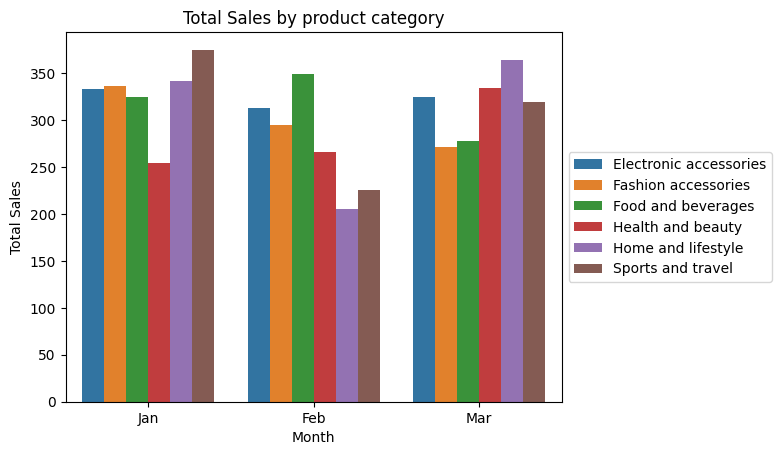

In [ ]:
grouped_data = df.groupby(['Product line', 'month']).agg({'Sales': 'sum'}).reset_index()
df['month'] = pd.Categorical(df['month'], categories=['Jan', 'Feb', 'Mar'], ordered=True)
sns.barplot(data=grouped_data, x='month', y='Sales', hue='Product line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Total Sales by product category')
plt.show()

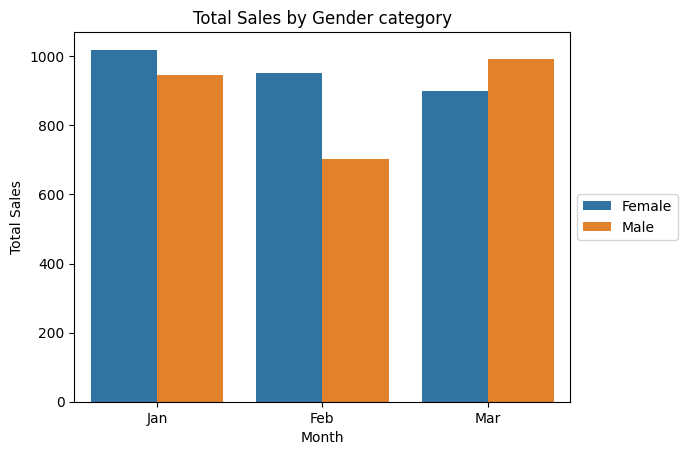

In [ ]:
grouped_data = df.groupby(['Gender', 'month']).agg({'Sales': 'sum'}).reset_index()
df['month'] = pd.Categorical(df['month'], categories=['Jan', 'Feb', 'Mar'], ordered=True)
sns.barplot(data=grouped_data, x='month', y='Sales', hue='Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Total Sales by Gender category')
plt.show()

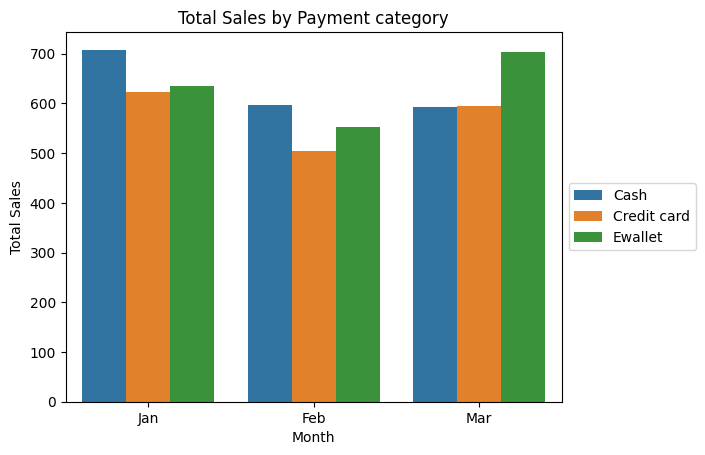

In [ ]:
grouped_data = df.groupby(['Payment', 'month']).agg({'Sales': 'sum'}).reset_index()
df['month'] = pd.Categorical(df['month'], categories=['Jan', 'Feb', 'Mar'], ordered=True)
sns.barplot(data=grouped_data, x='month', y='Sales', hue='Payment')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Payment category')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

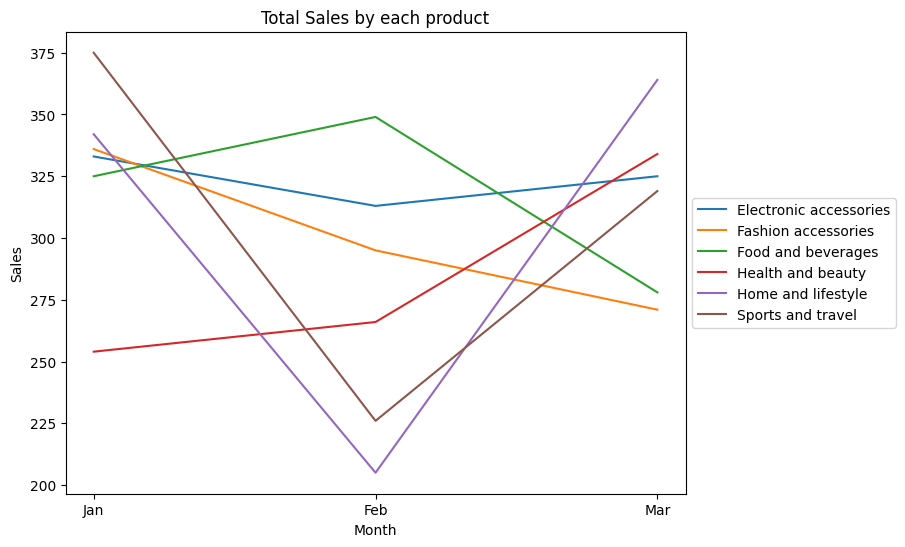

In [ ]:
product_df = df.groupby(['Product line','month']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(data=product_df, x='month', y='Sales' , hue = 'Product line' )
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by each product')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Text(0.5, 1.0, 'Total Sales by each product')

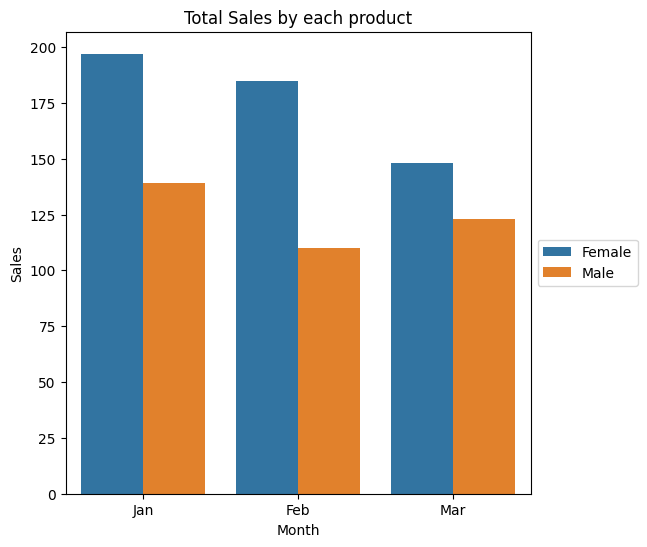

In [ ]:
product_df = df[df['Product line'] == 'Fashion accessories'].groupby(['month','Gender']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(data=product_df, x='month', y='Sales', hue = 'Gender' )
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Total Sales by each product')

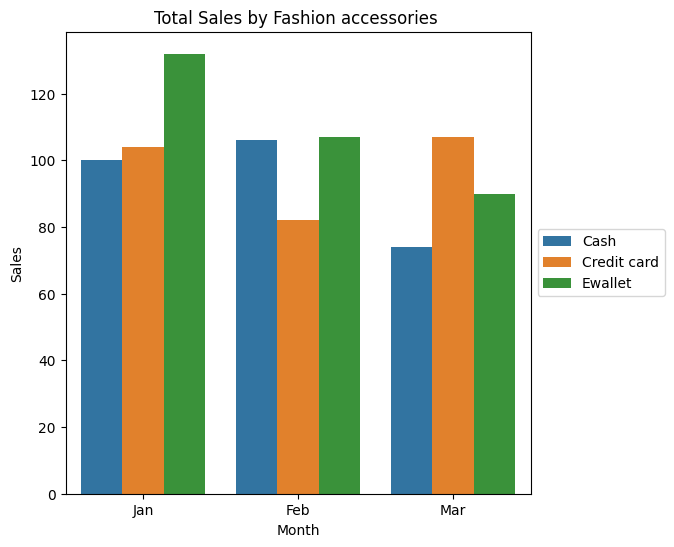

In [ ]:
product_df = df[df['Product line'] == 'Fashion accessories'].groupby(['month','Payment']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(data=product_df, x='month', y='Sales', hue =('Payment'))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by Fashion accessories ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<ipython-input-60-8ad89bed8640>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Payment_Gender'] = df['Payment'] + '_' + df['Gender']


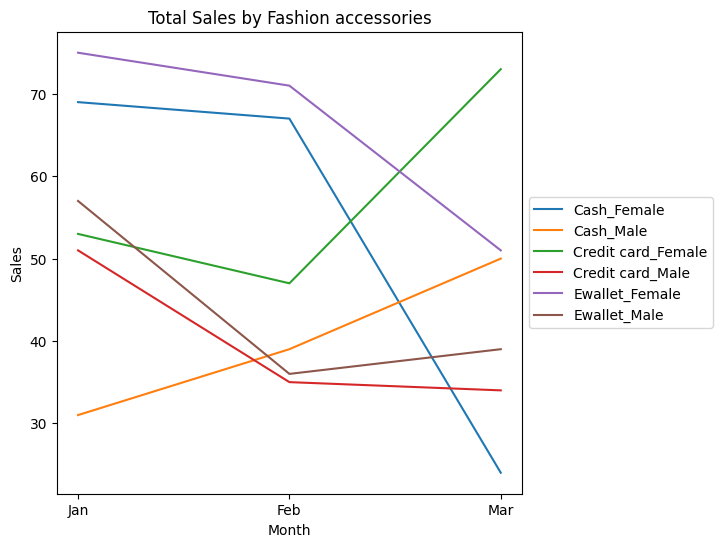

In [ ]:
product_df = df[df['Product line'] == 'Fashion accessories']
product_df['Payment_Gender'] = df['Payment'] + '_' + df['Gender']
product_df = product_df.groupby(['month','Payment_Gender']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(6, 6))
sns.lineplot(data=product_df, x='month', y='Sales', hue='Payment_Gender')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by Fashion accessories')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

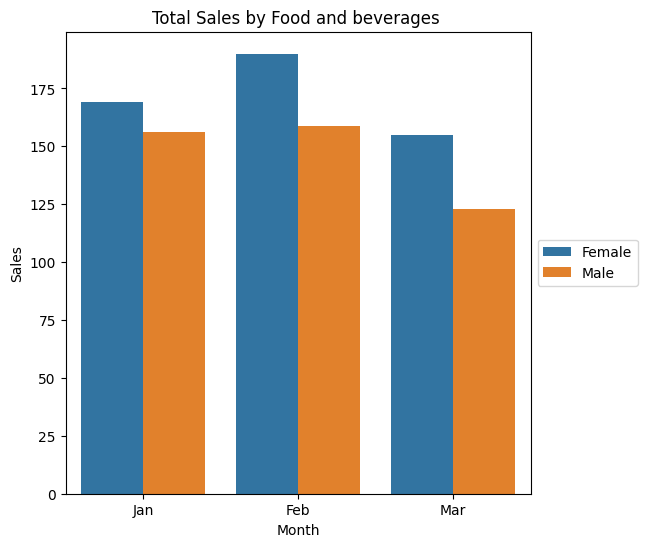

In [ ]:
product_df = df[df['Product line'] == 'Food and beverages'].groupby(['month','Gender']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(data=product_df, x='month', y='Sales', hue = 'Gender' )
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by Food and beverages ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

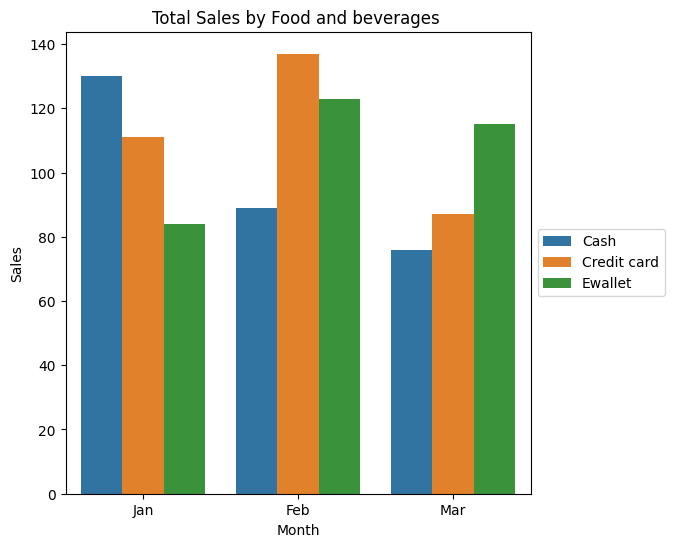

In [ ]:
product_df = df[df['Product line'] == 'Food and beverages'].groupby(['month','Payment']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(data=product_df, x='month', y='Sales', hue =('Payment'))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by Food and beverages ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<ipython-input-62-93929efaba1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Payment_Gender'] = df['Payment'] + '_' + df['Gender']


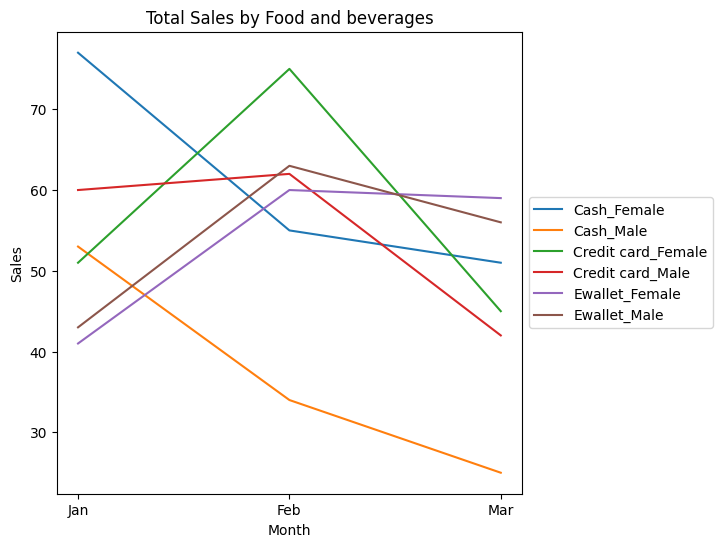

In [ ]:
product_df = df[df['Product line'] == 'Food and beverages']
product_df['Payment_Gender'] = df['Payment'] + '_' + df['Gender']
product_df = product_df.groupby(['month','Payment_Gender']).agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(6, 6))
sns.lineplot(data=product_df, x='month', y='Sales', hue='Payment_Gender')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by Food and beverages')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))